<a href="https://colab.research.google.com/github/btramduong0810/dsc-mod-1-project-v2-1-online-ds-sp-000/blob/master/Data_Science_in_Action_The_Movie_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

* Student name: **BAO TRAM DUONG**
* Student pace: **SELF-PACED DATA SCIENCE PROGRAM**
* Scheduled project review date/time: 
* Instructor name: **JEFF HERMAN**
* Blog post URL:


# **Part III: Table of Contents**

**1.  Introduction**

1.1  Business Statement

**2.  Data Visualization**

2.1 Budget vs Gross

2.2 Genre vs. Gross

2.3 Others: Source, Creative Type, Production Method vs. Gross

2.4 Runtime vs. Gross

2.5 Release time vs. Gross

2.6 Others: Director, Writer, Critic, Publisher vs. Gross

2.7 Popularity / Words of Mouth:

**3. Actionable Insights**

**4. Conclusion and Future Work**

4.1  Summary of Findings

4.2  Actionable Insights

4.3  Future Works

# **1. INTRODUCTION**

## **1.1 Business Statement**

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired a team of data scientist from Flatiron to help them better understand the movie industry. The team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. The team must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

What makes a movie succesful and how do we create the next blockbuster movie that can return the highest ROI possible?


# **2. DATA VISUALIZATION**

## Display the full dataset

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context("talk", rc={"lines.linewidth": 2})
sns.set_style('darkgrid')

In [37]:
#read data
full_df = pd.read_csv('full_df', index_col=0)

#preview
full_df.head()

,movie,release_year,studio,language,popularity,runtime_minutes,average_rating,num_votes,release_date,genre,...,production_method,creative_type,production_budget,domestic_gross,international_gross,worldwide_gross,worldwide_profit,domestic_profit,international_profit,worldwide_profit_margin
0,Avengers: Age of Ultron,2015,BV,en,44.383,141.0,7.3,665594,2015-05-01,Action,...,Animation/Live Action,Super Hero,365000000,459005868,937093334,1396099202,1031099202,94005868,572093334,73.855726
1,Avengers: Infinity War,2018,BV,en,80.773,149.0,8.5,670926,2018-04-27,Action,...,Animation/Live Action,Super Hero,300000000,678815482,1365725041,2044540523,1744540523,378815482,1065725041,85.326777
2,Justice League,2017,WB,en,34.953,120.0,6.5,329135,2017-11-17,Action,...,Live Action,Super Hero,300000000,229024295,426920914,655945209,355945209,-70975705,126920914,54.264473
3,Spectre,2015,Sony,en,30.318,148.0,6.8,352504,2015-11-06,Action,...,Live Action,Contemporary Fiction,300000000,200074175,679426585,879500760,579500760,-99925825,379426585,65.889740
4,The Dark Knight Rises,2012,WB,en,26.220,164.0,8.4,1387769,2012-07-20,Action,...,Live Action,Super Hero,230000000,448139099,634089008,1082228107,852228107,218139099,404089008,78.747549


## Question 1: Is there a correlation between production budget and profit? If so, how much should Microsoft invest into production to get the highest ROI?

We will analyze Production Budget in regards to Profit 

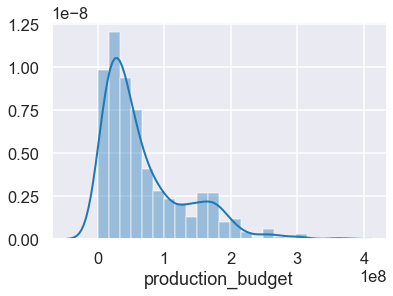

In [54]:
#let's check out production_budget distribution
y_values = full_df['production_budget'].sort_values(ascending=False)

sns.distplot(y_values)

We are interested in worldwide_profit and worldwide_profit_margin as this reflect the total profit earned. However, keep in mind that this only reflect box office earning and exclude merchandise sales, DVD sales and other streaming rights.

In [17]:
#remove scientific notation
full_df['worldwide_profit'].describe().apply(lambda x: format(x, 'f'))

count           625.000000
mean      179073829.838400
std       232771780.749692
min       -63357202.000000
25%        41134059.000000
50%        91792744.000000
75%       211979256.000000
max      1744540523.000000
Name: worldwide_profit, dtype: object

In [18]:
#remove scientific notation
full_df['worldwide_profit_margin'].describe().apply(lambda x: format(x, 'f'))

count     625.000000
mean       63.579227
std        26.790344
min      -102.781191
25%        54.088913
50%        69.632337
75%        80.749221
max        99.759941
Name: worldwide_profit_margin, dtype: object

In [ ]:
#distribution of worlwide_gross

## Question 2: What kind of movie contents, in term of genre, source, creative type, production method, perform the best?

Let's first investigate Genre in regards to Profit

Now we are taking a look at Source Creative Type, Production Method in correlation with Profit

## Question 3: When is the best time of year to release a movie, in term of month and day of the week?

To answer this question, let's look at Release Time

Let's look at how these movie perform at different lease months:

## Question 4: Can popularity or words of mouth, in term of rating and number of votes, affect the performance of a movie?

Let's look at Rating, Number of Votes (num_votes), and also Studio (studio):

## Question 5: Is runtime a factor in determining the success of a movie?

Finally, let's look at Runtime (runtime_minutes)

## Extra: Is there one single best studio?

In [42]:
#let's see how many studio there are and pick 10 best ones
y_values = full_df['studio'].value_counts(normalize=True, ascending=False)[:10]

#pick 10 best one
y_values[:10]

Uni.       0.1552
Fox        0.1392
WB         0.1152
BV         0.0896
Sony       0.0800
Par.       0.0800
WB (NL)    0.0640
LGF        0.0512
LG/S       0.0304
SGem       0.0272
Name: studio, dtype: float64

Text(0, 0.5, 'Percentage %')

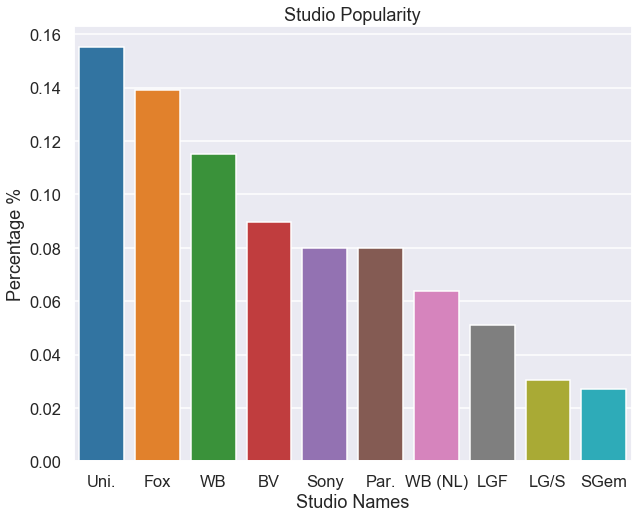

In [44]:
#plot
x_values = y_values.index
plt.figure(figsize = (10,8))
sns.barplot(x_values, y_values)
plt.title('Studio Popularity')
plt.xlabel('Studio Names')
plt.ylabel('Percentage %')

## Extra: What is the most popular language?

In [48]:
#check to see the most 10 popular languages
y_values = full_df['language'].value_counts(normalize=True)[:10]
x_values = y_values.index

y_values #looks like there is only one

en    1.0
Name: language, dtype: float64

Text(0, 0.5, 'Percentage %')

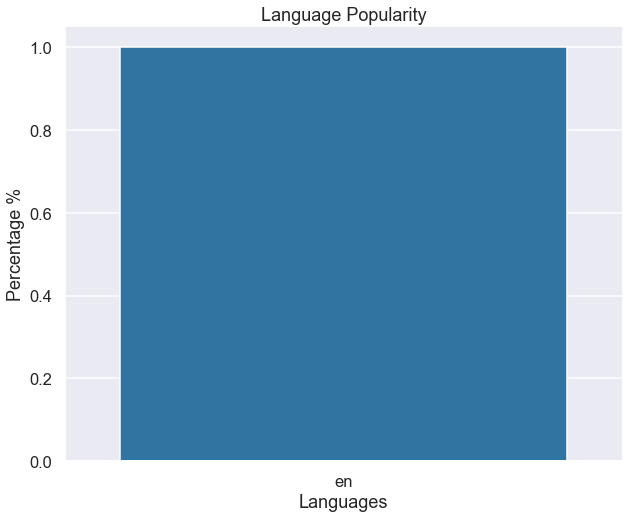

In [49]:
#plot
x_values = y_values.index
plt.figure(figsize = (10,8))
sns.barplot(x_values, y_values)
plt.title('Language Popularity')
plt.xlabel('Languages')
plt.ylabel('Percentage %')

# 3. ACTIONABLE INSIGHTS

# **4. CONCLUSION & FUTURE WORKS**

**Future works:**

There are other factors such as star quality, quality of script, special effects, marketing campaign, popularity of the film preceding it (if it's a sequel), competition or lack thereof, competition from non-movie events such as weather or news and sport events. 

Director and writer are also interesting to look at.

Movie researchers has also found that critics have a dual role, where they both influence consumers' movie choice and predict box office performance by reflecting moviegoers' tastes. Unfortunately we won't be investigating these features as they will take up extra time and are all outside the scope of this project.